In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Ken Jee's YouTube Channel

# Summary code 
In this notebook I explore Ken's YouTube data.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in data 
df_vid = pd.read_csv('Aggregated_Metrics_By_Video.csv')
df_vid_subs = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv.zip')
df_ts = pd.read_csv('Video_Performance_Over_Time.csv.zip')
df_comments = pd.read_csv('All_Comments_Final.csv.zip')

In [4]:
#look at columns for each dataframe 
print(df_vid.columns)
print(df_vid_subs.columns)
print(df_ts.columns)
print(df_comments.columns)


Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')
Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')
Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Sub

### 1st row contains some aggregates, that may be confusing for now

In [5]:
df_vid = df_vid[1:]
df_vid.head(2)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72


In [6]:
df_vid.dtypes

Video                                    object
Video title                              object
Video pub­lish time                      object
Com­ments ad­ded                          int64
Shares                                    int64
Dis­likes                                 int64
Likes                                     int64
Sub­scribers lost                         int64
Sub­scribers gained                       int64
RPM (USD)                               float64
CPM (USD)                               float64
Av­er­age per­cent­age viewed (%)       float64
Av­er­age view dur­a­tion                object
Views                                     int64
Watch time (hours)                      float64
Sub­scribers                              int64
Your es­tim­ated rev­en­ue (USD)        float64
Im­pres­sions                             int64
Im­pres­sions click-through rate (%)    float64
dtype: object

### Let's rename columns to some short and suitable names

In [7]:
df_vid = df_vid.rename(columns={'Video':'id', 'Video title':'title', 'Video pub­lish time':'date', 
                        'Com­ments ad­ded':'comments','Shares':'shares', 'Dis­likes':'dislikes',
                        'Likes':'likes','Sub­scribers lost':'lost_subs',
                        'Sub­scribers gained':'gained_subs','RPM (USD)':'rpm', 'CPM (USD)':'cpm',
                        'Av­er­age per­cent­age viewed (%)':'average_view_pct',
                        'Av­er­age view dur­a­tion':'average_view_time','Views':'views',
                        'Watch time (hours)':'watch_time','Sub­scribers':'subscribers',
                        'Your es­tim­ated rev­en­ue (USD)':'estimated_revenue','Im­pres­sions':'impressions',
                        'Im­pres­sions click-through rate (%)':'CTRate'})

In [8]:
videos = df_vid
videos.columns

Index(['id', 'title', 'date', 'comments', 'shares', 'dislikes', 'likes',
       'lost_subs', 'gained_subs', 'rpm', 'cpm', 'average_view_pct',
       'average_view_time', 'views', 'watch_time', 'subscribers',
       'estimated_revenue', 'impressions', 'CTRate'],
      dtype='object')

# Problem Set / Questions to be Answered

- What topics get the most viewership?
- What do are people asking for in the comments?
- What impacts watch time and click through rate?
- Can we predict if a title will be clickable? 
- What thumbnails are most appealing (thumbnail data available in df_agg)
- What is different about my "viral" videos and normal videos
- Who is the core audience of my channel?

### What 'Aggregated_Metrics_By_Videos.csv' data set tells?

In [9]:
videos.head(2)

,id,title,date,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72


the data set tells for every video:
- comments it gained
- how much it was shared
- how much it was liked and disliked
- subscribers
- view stats
- click-through rate

How many videos?

In [10]:
videos.shape

(223, 19)

## Q1- What topics get the most viewership?

# Making Observations

the data set contains some vids with -ve subscribers, lets filter them out

In [11]:
sub_videos = videos[videos['subscribers']>0]
sub_videos.shape

(216, 19)

In [12]:
(216/223)*100

96.8609865470852

96.9% videos did gain subscribers.

In [13]:
sub_videos = sub_videos.sort_values(by='views')
sub_videos.describe()

,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,215.000000,216.000000,2.160000e+02,216.000000,216.000000,216.000000,2.160000e+02,216.000000
mean,61.601852,183.240741,17.967593,1038.115741,13.333333,606.129630,4.503509,11.533986,34.350046,2.569858e+04,1466.255796,592.796296,134.410125,4.639384e+05,3.095324
std,87.874322,744.525732,70.651216,3631.886949,33.720879,3353.954989,1.763560,3.321150,14.375554,9.096247e+04,4876.113005,3321.804153,562.989055,1.893355e+06,1.567778
min,2.000000,0.000000,0.000000,18.000000,0.000000,2.000000,0.000000,5.439000,7.320000,4.550000e+02,6.308900,1.000000,0.000000,1.863500e+04,0.490000
25%,19.000000,22.000000,1.000000,168.000000,2.000000,29.000000,3.320750,9.481000,23.975000,4.044500e+03,187.472575,22.750000,13.063250,9.947100e+04,1.965000
50%,37.000000,48.000000,4.000000,358.500000,7.000000,76.500000,4.348500,11.302000,35.500000,8.671500e+03,420.520800,66.000000,34.363000,1.542310e+05,2.905000
75%,65.250000,115.500000,11.000000,722.500000,14.000000,260.500000,5.427500,12.974500,43.462500,1.852425e+04,1157.035775,243.500000,97.246500,3.005855e+05,3.992500
max,907.000000,9583.000000,942.000000,46903.000000,451.000000,46904.000000,10.387000,37.786000,75.620000,1.253559e+06,65850.704200,46453.000000,7959.533000,2.649880e+07,8.620000


75th percentile is 43.5 in avg view %age, 1.852425e+04 in views, 1157.035775 in watch_time

In [14]:
sub_videos[sub_videos['views']>18524].shape

(54, 19)

out of 223 videos 59 lie in 75th percentile, and 53 had more than 18.5k views

In [15]:
sub_videos[sub_videos['views']>18524]['likes'].max()

46903

In [16]:
from collections import defaultdict

In [17]:
words = defaultdict(int)
 
# memoizing count
for sub in sub_videos[sub_videos['views']>18000]['title']:
    for wrd in sub.split():
        words[wrd] += 1
 
# getting max frequency
for i in words:
    if words[i] >10:
        print(i, words[i])

to 11
a 14
Data 58
Science 43
- 11
How 17
I 13


Let's see what the release dates of most viewed videos tell?

In [18]:
sub_videos['date'] = pd.to_datetime(sub_videos['date'])

In [19]:
sub_videos[sub_videos['views']>18000]['date'].min()

Timestamp('2018-11-14 00:00:00')

In [20]:
sub_videos[sub_videos['views']>18000]['date'].max()

Timestamp('2021-12-27 00:00:00')

In [21]:
DS_vids = sub_videos[sub_videos['title'].str.contains('Data Science')]
DS_vids['title'].count()

143

From November 2018 to December 2021 there are 143 videos on Data Science. About 64% videos are on Data Science, in total data set.

In [22]:
DS_vids[DS_vids['views']>18000]['title'].count()

44

out of 143 Data Science videos, 44 had more than 18000 views.

Let's see what is the date range for these videos

In [23]:
DS_vids[DS_vids['views']>18000]['date'].min()

Timestamp('2018-11-14 00:00:00')

In [24]:
DS_vids_copy = DS_vids.copy()
DS_vids_copy['date'] = DS_vids_copy['date'].dt.to_period('Q')
DS_vids_copy = DS_vids_copy.groupby('date')

In [25]:
DS_vids_copy.count()

,id,title,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
date,,,,,,,,,,,,,,,,,,
2018Q4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2019Q1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2019Q2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2019Q3,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2019Q4,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2020Q1,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2020Q2,27,27,27,27,27,27,27,27,27,26,27,27,27,27,27,27,27,27
2020Q3,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
2020Q4,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


most Data Science videos were released in year 2020

In [26]:
DS_vids[(DS_vids['date']>('2019-12-31'))  & (DS_vids['date']<('2021-01-01')) & (DS_vids['views']==482)]

,id,title,date,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
213,foggudmDDvY,Data Science in Golf: PGA Merchandise Show 2020,2020-01-31,6,5,0,18,0,2,3.529,12.105,38.65,0:03:31,482,28.3566,2,1.701,41477,0.69


In [27]:
DS_vids[(DS_vids['date']>('2019-12-31'))  & (DS_vids['date']<('2021-01-01')) & (DS_vids['views']==1253559)]

,id,title,date,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,2020-05-08,907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14


What about videos without Data Science?

In [28]:
NDS_vids = sub_videos[~sub_videos['title'].str.contains('Data Science')]
NDS_vids['title'].count()

73

In [29]:
NDS_vids[NDS_vids['views']>=18000]['title'].count()

13

In [30]:
words = defaultdict(int)
 
# memoizing count
for sub in NDS_vids[NDS_vids['views']>18000]['title']:
    for wrd in sub.split():
        words[wrd] += 1
 
# getting max frequency
for i in words:
    if words[i] >10:
        print(i, words[i])

In [31]:
DS_videos = 143
DS_videos_18k = 44
non_DS_videos = 73
non_DS_videos_18k = 13

print("18K+ videos' percentage of Data Science Videos: ", round((DS_videos_18k/DS_videos)*100))
print("18K+ videos' percentage of Non-Data Science Videos: ", round((non_DS_videos_18k/non_DS_videos)*100))

18K+ videos' percentage of Data Science Videos:  31
18K+ videos' percentage of Non-Data Science Videos:  18


# Some Observations about Videos' Titles

- **there are total 223 videos**
- **216/223 videos got subscribers**
- **54/223 videos lie in the 75th percentile and made 18k+ views**
- **in these 54 videos *Data Science* was most commonly used in title**
- **143/223 (60%) videos are related to *Data Science***
- **44/143 *Data Science* videos got 18k+ views**
- **most Data Science videos were released in the Year 2020 i.e 87/143**
- **73/223 videos did not had Data Science in their title**
- **13/73 Non-Data Science videos got 18k+ views**

> 33% Data Science Videos got 18k+ views i.e 44/143 videos

> 18% Non-Data Science videos got 18k+ views i.e 13/73 videos

# What affects Watch Time and CTR?

# A related question: did all greater impressions bring greater subscribers?

Let's first try to answer this

In [32]:
sub_videos.head()

,id,title,date,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
207,iqG59TqfFdY,5 Data Science Resolutions for 2020,2019-12-27,7,3,0,24,2,5,2.404,22.678,43.75,0:02:12,455,16.6975,3,1.094,34674,0.87
213,foggudmDDvY,Data Science in Golf: PGA Merchandise Show 2020,2020-01-31,6,5,0,18,0,2,3.529,12.105,38.65,0:03:31,482,28.3566,2,1.701,41477,0.69
179,Zz_Mx1UPswI,Thank You For The Support | What's Next | Ken ...,2019-08-26,14,4,0,24,0,7,0.542,12.098,39.37,0:00:44,506,6.3089,7,0.274,25885,0.54
220,Yr5T3T4tq-g,Most Data Science Hopefuls Overlook This Impor...,2019-05-25,3,0,0,44,0,5,3.374,15.596,58.62,0:02:06,548,19.2752,5,1.849,21780,1.61
211,3ysXGYjvbSU,Why is Balance Important in Data Science?,2019-10-16,6,2,0,31,3,4,3.275,14.950,52.42,0:02:04,612,21.2073,1,2.004,32650,1.17


<AxesSubplot:xlabel='impressions', ylabel='views'>

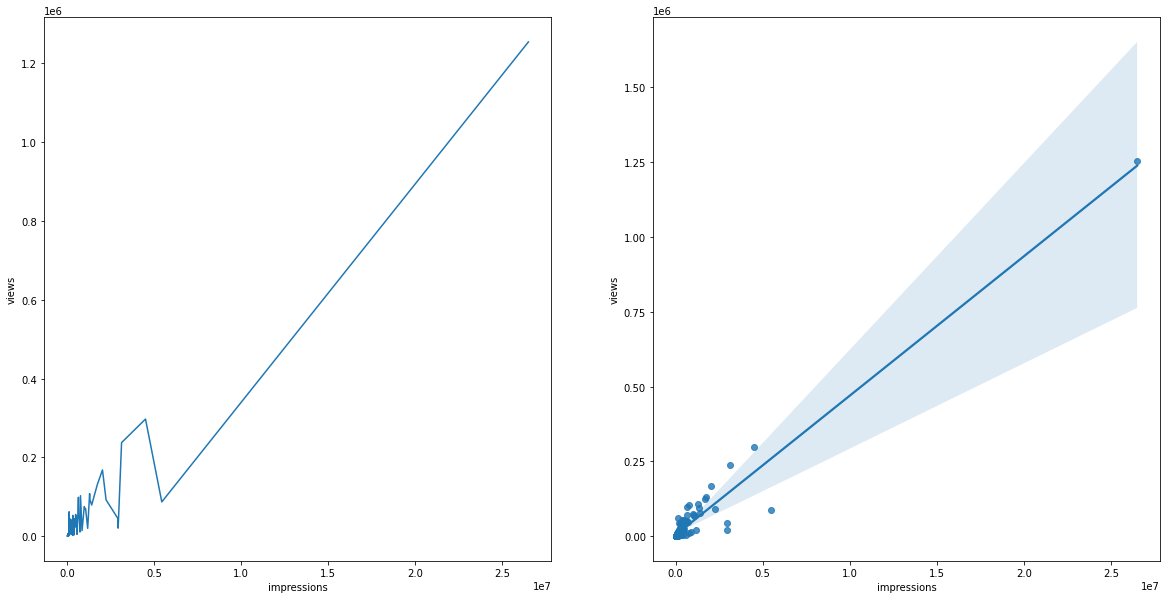

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.lineplot(data=sub_videos, x='impressions', y='views', ax=ax[0])
sns.regplot(data=sub_videos, x='impressions', y='views', ax=ax[1])

views and impressions have a direct relation

In [35]:
sub_videos.columns

Index(['id', 'title', 'date', 'comments', 'shares', 'dislikes', 'likes',
       'lost_subs', 'gained_subs', 'rpm', 'cpm', 'average_view_pct',
       'average_view_time', 'views', 'watch_time', 'subscribers',
       'estimated_revenue', 'impressions', 'CTRate'],
      dtype='object')

<AxesSubplot:xlabel='subscribers', ylabel='views'>

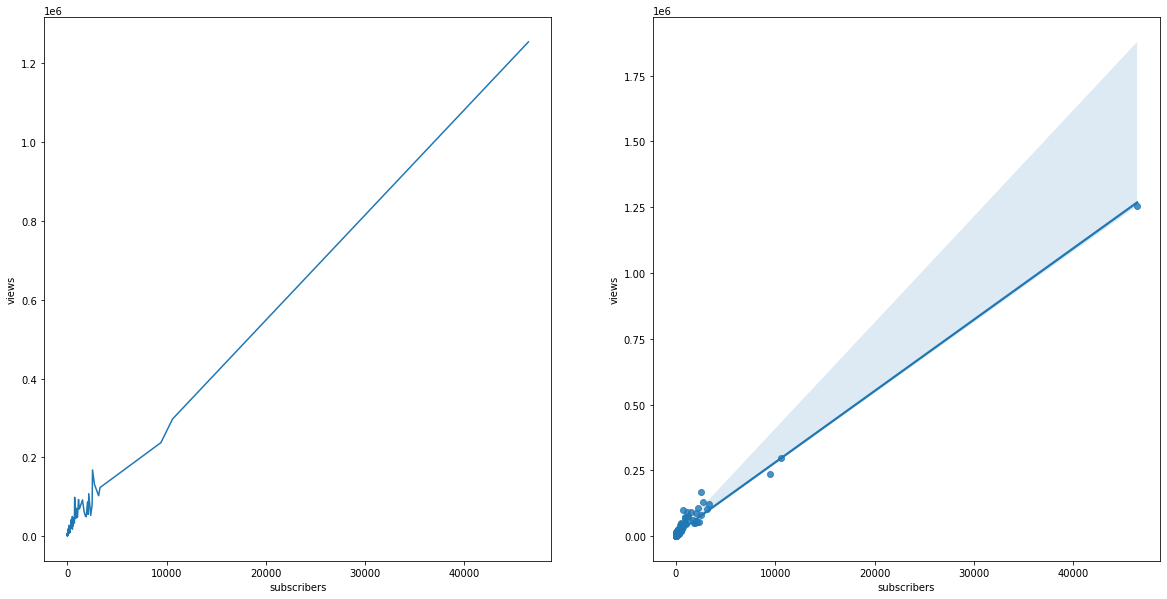

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.lineplot(data=sub_videos, x='subscribers', y='views', ax=ax[0])
sns.regplot(data=sub_videos, x='subscribers', y='views', ax=ax[1])

greater the views, greater the possibility of subscribers

/home/irfan/.virtualenvs/ds_env-tSQ1-V2S/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


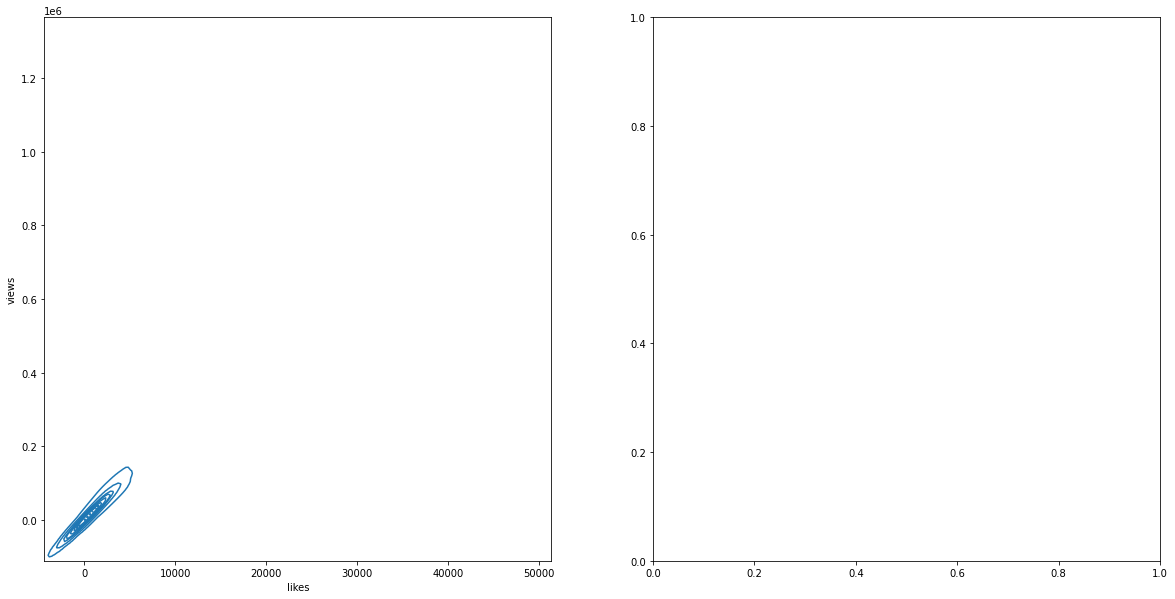

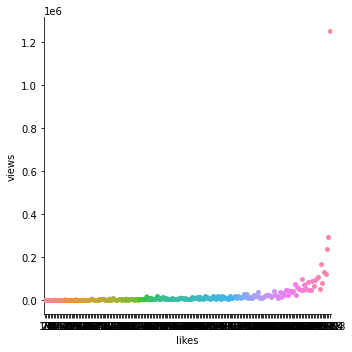

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.kdeplot(data=sub_videos, x='likes', y='views', ax=ax[0])
sns.catplot(data=sub_videos, x='likes', y='views', ax=ax[1])

<AxesSubplot:xlabel='impressions', ylabel='views'>

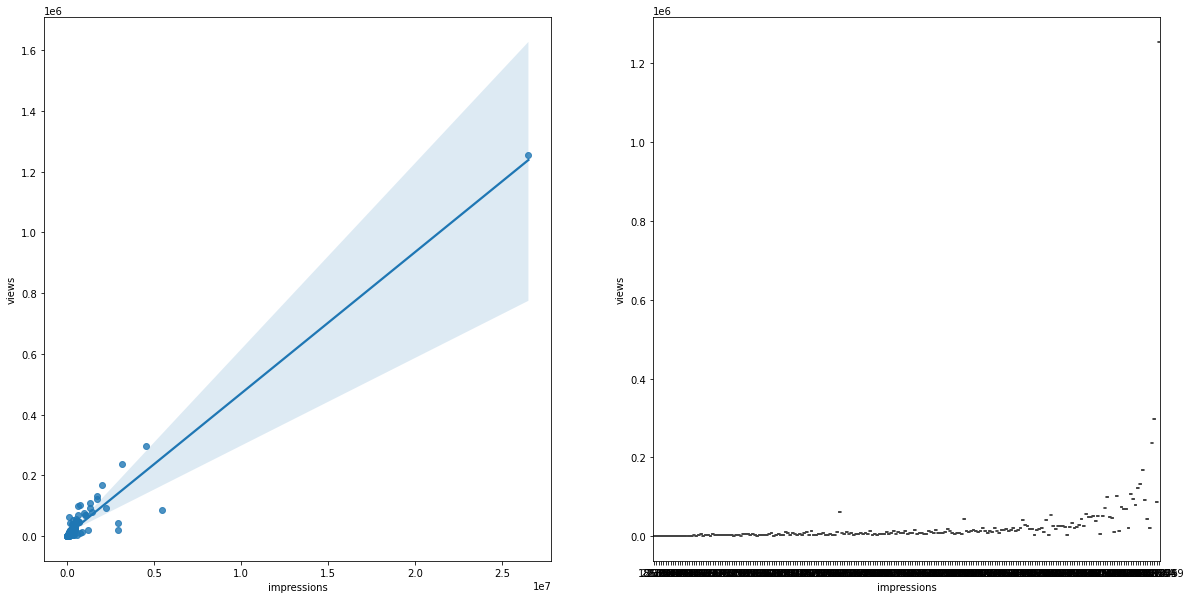

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.regplot(data=sub_videos, x='impressions', y='views', ax=ax[0])
sns.boxplot(data=sub_videos, x='impressions', y='views', ax=ax[1])

<AxesSubplot:xlabel='likes', ylabel='views'>

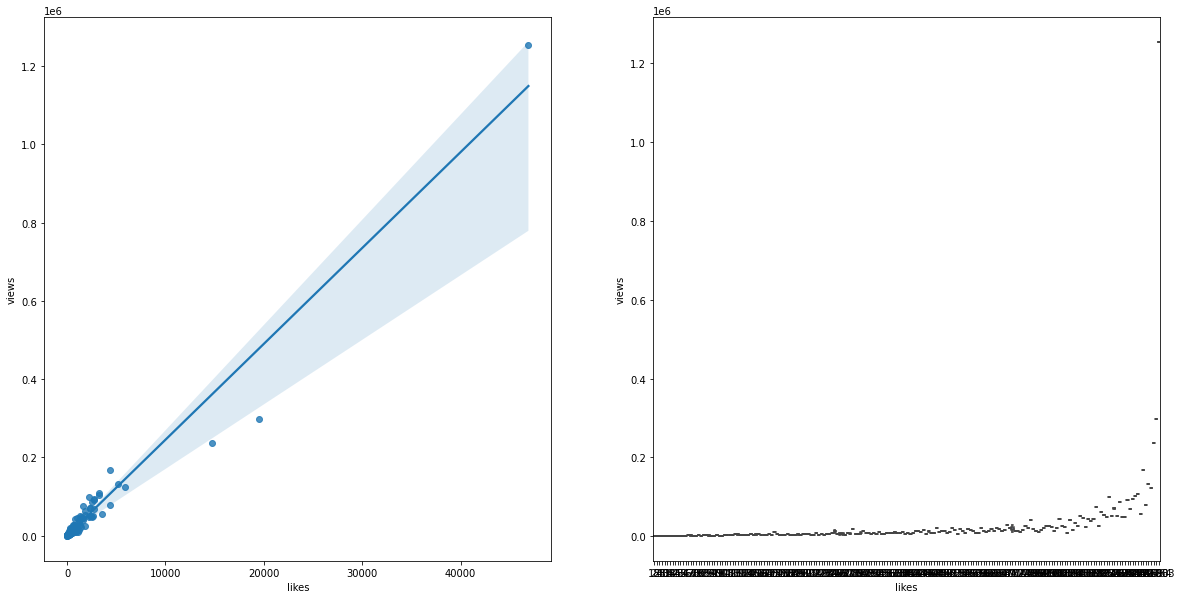

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.regplot(data=sub_videos, x='likes', y='views', ax=ax[0])
sns.boxplot(data=sub_videos, x='likes', y='views', ax=ax[1])

<AxesSubplot:xlabel='subscribers', ylabel='views'>

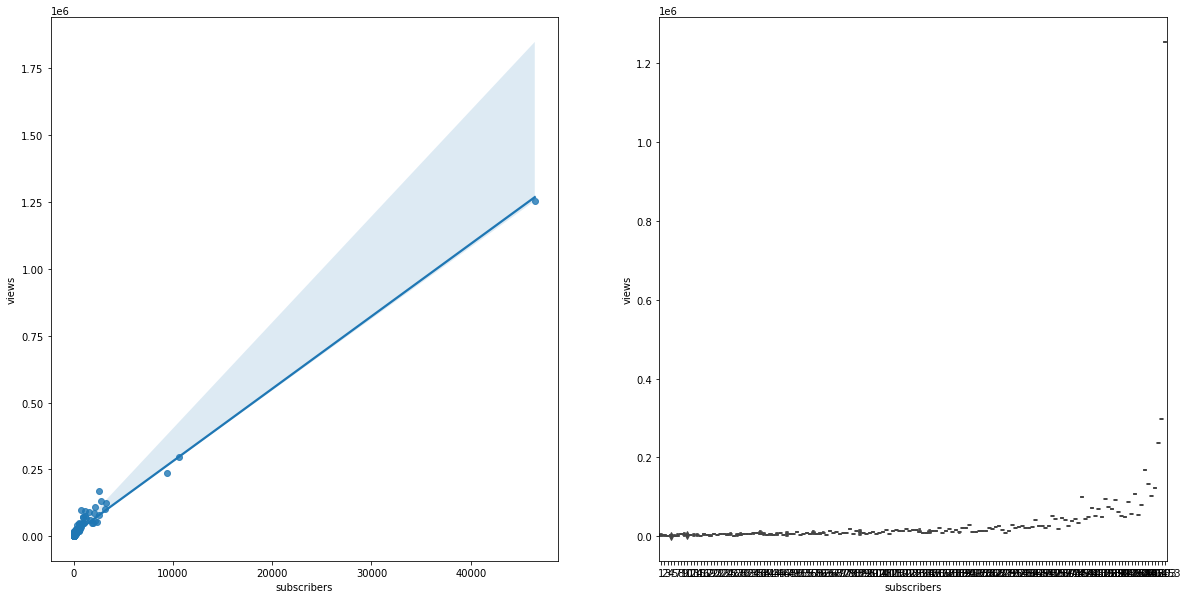

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.regplot(data=sub_videos, x='subscribers', y='views', ax=ax[0])
sns.boxplot(data=sub_videos, x='subscribers', y='views', ax=ax[1])

<AxesSubplot:xlabel='impressions', ylabel='views'>

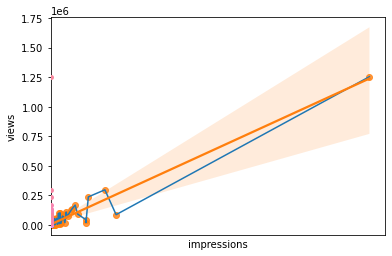

In [59]:
ax = plt.plot(figsize=(20,10))
ax = sns.stripplot(data=sub_videos, x='impressions', y='views')
sns.boxplot(data=sub_videos, x='impressions', y='views', ax=ax)
sns.lineplot(data=sub_videos, x='impressions', y='views', ax=ax)
sns.regplot(data=sub_videos, x='impressions', y='views', ax=ax)


<AxesSubplot:xlabel='subscribers', ylabel='views'>

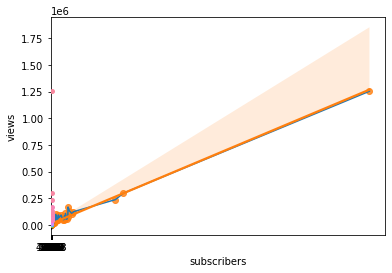

In [60]:
ax = plt.plot(figsize=(20,10))
ax = sns.stripplot(data=sub_videos, x='subscribers', y='views')
sns.boxplot(data=sub_videos, x='subscribers', y='views', ax=ax)
sns.lineplot(data=sub_videos, x='subscribers', y='views', ax=ax)
sns.regplot(data=sub_videos, x='subscribers', y='views', ax=ax)


<AxesSubplot:xlabel='impressions', ylabel='subscribers'>

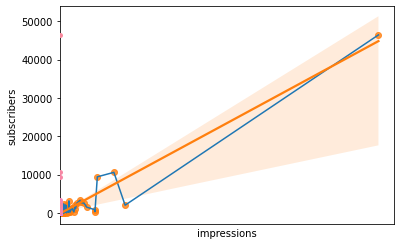

In [61]:
ax = plt.plot(figsize=(20,10))
ax = sns.stripplot(data=sub_videos, x='impressions', y='subscribers')
sns.boxplot(data=sub_videos, x='impressions', y='subscribers', ax=ax)
sns.lineplot(data=sub_videos, x='impressions', y='subscribers', ax=ax)
sns.regplot(data=sub_videos, x='impressions', y='subscribers', ax=ax)


<AxesSubplot:xlabel='impressions', ylabel='likes'>

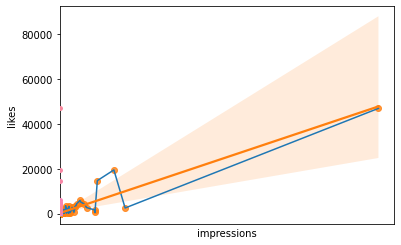

In [62]:
ax = plt.plot(figsize=(20,10))
ax = sns.stripplot(data=sub_videos, x='impressions', y='likes')
sns.boxplot(data=sub_videos, x='impressions', y='likes', ax=ax)
sns.lineplot(data=sub_videos, x='impressions', y='likes', ax=ax)
sns.regplot(data=sub_videos, x='impressions', y='likes', ax=ax)


<AxesSubplot:xlabel='views', ylabel='CTRate'>

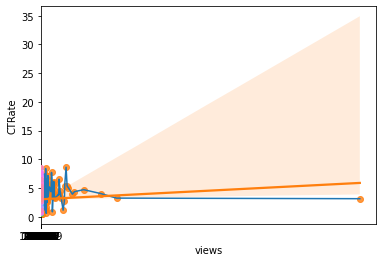

In [63]:
ax = plt.plot(figsize=(20,10))
ax = sns.stripplot(data=sub_videos, x='views', y='CTRate')
sns.boxplot(data=sub_videos, x='views', y='CTRate', ax=ax)
sns.lineplot(data=sub_videos, x='views', y='CTRate', ax=ax)
sns.regplot(data=sub_videos, x='views', y='CTRate', ax=ax)


views and CTRate do not have a good coordination

<AxesSubplot:xlabel='watch_time', ylabel='CTRate'>

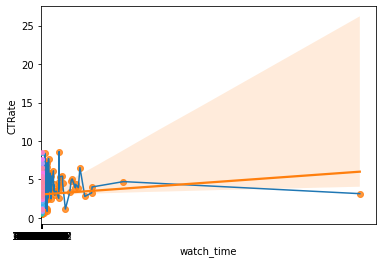

In [64]:
ax = plt.plot(figsize=(20,10))
ax = sns.stripplot(data=sub_videos, x='watch_time', y='CTRate')
sns.boxplot(data=sub_videos, x='watch_time', y='CTRate', ax=ax)
sns.lineplot(data=sub_videos, x='watch_time', y='CTRate', ax=ax)
sns.regplot(data=sub_videos, x='watch_time', y='CTRate', ax=ax)


behavior of watch_time and CTRate is complicated too

<AxesSubplot:xlabel='impressions', ylabel='watch_time'>

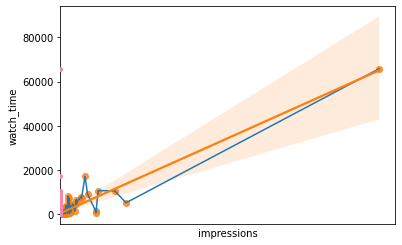

In [65]:
ax = plt.plot(figsize=(20,10))
ax = sns.stripplot(data=sub_videos, x='impressions', y='watch_time')
sns.boxplot(data=sub_videos, x='impressions', y='watch_time', ax=ax)
sns.lineplot(data=sub_videos, x='impressions', y='watch_time', ax=ax)
sns.regplot(data=sub_videos, x='impressions', y='watch_time', ax=ax)


In [66]:
sub_videos.columns

Index(['id', 'title', 'date', 'comments', 'shares', 'dislikes', 'likes',
       'lost_subs', 'gained_subs', 'rpm', 'cpm', 'average_view_pct',
       'average_view_time', 'views', 'watch_time', 'subscribers',
       'estimated_revenue', 'impressions', 'CTRate'],
      dtype='object')

In [36]:
sub_videos.head()

,id,title,date,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
207,iqG59TqfFdY,5 Data Science Resolutions for 2020,2019-12-27,7,3,0,24,2,5,2.404,22.678,43.75,0:02:12,455,16.6975,3,1.094,34674,0.87
213,foggudmDDvY,Data Science in Golf: PGA Merchandise Show 2020,2020-01-31,6,5,0,18,0,2,3.529,12.105,38.65,0:03:31,482,28.3566,2,1.701,41477,0.69
179,Zz_Mx1UPswI,Thank You For The Support | What's Next | Ken ...,2019-08-26,14,4,0,24,0,7,0.542,12.098,39.37,0:00:44,506,6.3089,7,0.274,25885,0.54
220,Yr5T3T4tq-g,Most Data Science Hopefuls Overlook This Impor...,2019-05-25,3,0,0,44,0,5,3.374,15.596,58.62,0:02:06,548,19.2752,5,1.849,21780,1.61
211,3ysXGYjvbSU,Why is Balance Important in Data Science?,2019-10-16,6,2,0,31,3,4,3.275,14.950,52.42,0:02:04,612,21.2073,1,2.004,32650,1.17


let's first utilize some intuition

- title may be a cause for some one to watch video or skip it
- comments comes after watch, but some watch time also comes after comments
- shares/likes/dislikes come after watching, naturally
- appearance/thumbnails+titles may cause some one to watch or skip the video

#### What should we utilize for making observations?

- titles
- comments
- thumbnails

In [37]:
df_ts.head()

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0


In [38]:
len(df_ts['Video Title'].unique())

223

In [39]:
df_ts = df_ts.rename(columns={'Video Title':'title'})

this shows that time_series data too contains 223 videos

# What information can thumbnails provide?

Thumbnails are an easy way to attract or lose some one. We can ask following question from Thumbnails;
- Do most viewed videos have Human Face in thumbnails?
- Do all most viewed  videos have/lack Human Face in thumbnails?
- Do least viewed videos have Human Face in thumbnails?
- Do all least viewed videos have/lack human face?
- Does text in thumbnail match to Title in most viewed videos?
- Does text in thumbnail math to Title in least viewed videos?
- What were the characteristics of words in Thumbnail Text for most viewed videos?
- What were the characteristics of words in Thumbnail Text for least viewed videos?
- Based on Human face in Thumbnail and Text in thumbnail vs Text in Title, can we predict impressions/CTR for some videos?

# Following portion is adding face 0/1 in the video thumbnail

## Getting Videos' Thumbnails for Analysis

I'll add a column 'face' in the videos dataset to represent whether the thumbnail contains human face or not?

1 => contains human face,                   0 => does not contain human face

best_viewed_sample = list(sub_videos[sub_videos['views']>18524].sample(30)['title'])

thumbnails_links = [(i, j) for i, j in zip(df_ts['title'].unique(), df_ts['Thumbnail link'].unique())]

sub_videos= sub_videos.reset_index().drop('index', axis=1)

> the below cells contains methods methods for face detection and data set labelling

sub_videos['face'] = 0  # column tells whether thumnail contains human face or not
sub_videos['face'].head(2)

 fetching and processing images/thumbnails

 from pytesseract import pytesseract
import cv2
import urllib
import dlib

detector = dlib.get_frontal_face_detector()
 pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

df_ts['face'] = 0

def detect(f):
    img = f
    dets = detector(img, 1)
    return dets

def face_text(url, title):
    # open image
    try:
        resp = urllib.request.urlopen(url)
    except:
        resp = None
    if resp is not None:
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        
        # extract text from image
        # text = pytesseract.image_to_string(image)
        # sub_videos.loc[sub_videos['title']==title, 'thumbnail_text']=text
        
        # detect faces in images
        faces = detect(f=image)
        if len(faces)==0:
            sub_videos.loc[sub_videos['title']==title, 'face']=0
            df_ts.loc[df_ts['title']==title, 'face']=0
        else:
            sub_videos.loc[sub_videos['title']==title, 'face']=1
            df_ts.loc[df_ts['title']==title, 'face']=1
    else:
            # sub_videos.loc[sub_videos['title']==title, 'thumbnail_text']=None
            sub_videos.loc[sub_videos['title']==title, 'face']=None
            df_ts.loc[df_ts['title']==title, 'face']=None

for title, link in thumbnails_links:
    face_text(link, title)

In [63]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("how hard it can be?")

{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.1027}